# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:  
    **сalls** — количество звонков;  
    **minutes** — суммарная длительность звонков в минутах;  
    **messages** — количество sms-сообщений;  
    **mb_used** — израсходованный интернет-трафик в Мб;  
    **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

In [1]:
#подгружаю библиотеки
import pandas as pd
import matplotlib
import pylab
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("datasets/users_behavior.csv")
#df = pd.read_csv("users_behavior.csv")
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Вывод:**
> В нашем датафрейме 3214 строк (объектов) и 5 столбцов (признаков). Предобработка данных выполнена, пустых значений нет.

## Разбейте данные на выборки

In [4]:
#используя train_test_split разделим наш ДФ на следующие выборки 
df_train, df_valid = train_test_split(df, test_size=0.40, random_state=12345)
df_valid, df_test = train_test_split(df_valid, test_size = 0.5, random_state=12345)
print('Размер обучающей выборки:', df_train.shape[0],"объектов", (len(df_train) / len(df)*100), "%")
print('Размер валидационной выборки:', df_valid.shape[0],"объекта", len(df_valid) / len(df)*100, "%")
print('Размер тестовой выборки:',df_test.shape[0],"объекта", len(df_test) / len(df)*100, "%")

#Из материала лекции:
#обучающая выборка - 60%
#валидационная - 20%
#тестовая - 20%

Размер обучающей выборки: 1928 объектов 59.98755444928439 %
Размер валидационной выборки: 643 объекта 20.00622277535781 %
Размер тестовой выборки: 643 объекта 20.00622277535781 %


## Исследуйте модели

In [5]:
features = df.drop(["is_ultra"], axis=1)
targer = df["is_ultra"]

features_train = df_train.drop(["is_ultra"], axis=1)
target_train = df_train["is_ultra"]

features_valid = df_valid.drop(["is_ultra"], axis=1)
target_valid = df_valid["is_ultra"]

features_test = df_test.drop(["is_ultra"], axis=1)
target_test = df_test["is_ultra"]

In [26]:
#Посмотрим лучшую модель дерева решений на разной глубине
decision = []
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_split=3)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    decision.append(result)
    print('Depth:', depth, end='')
    print('        Accuracy:', result)
decision = pd.DataFrame(decision)

Depth: 1        Accuracy: 0.7542768273716952
Depth: 2        Accuracy: 0.7822706065318819
Depth: 3        Accuracy: 0.7853810264385692
Depth: 4        Accuracy: 0.7791601866251944
Depth: 5        Accuracy: 0.7791601866251944
Depth: 6        Accuracy: 0.7838258164852255
Depth: 7        Accuracy: 0.7822706065318819
Depth: 8        Accuracy: 0.7791601866251944
Depth: 9        Accuracy: 0.7822706065318819


In [25]:
decision.columns = ["model_quality_decision"]
decision

,model_quality_decision
0,0.754277
1,0.782271
2,0.785381
3,0.779160
4,0.779160
5,0.783826
6,0.782271
7,0.779160
8,0.782271


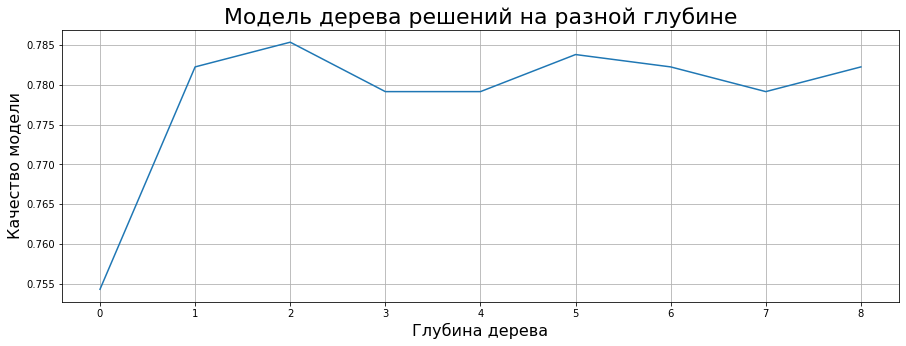

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(decision)
plt.xlabel("Глубина дерева", fontsize=16)
plt.ylabel("Качество модели", fontsize=16)
plt.title("Модель дерева решений на разной глубине", fontsize=22)
plt.grid()
plt.show()

По результатам исследования мы видим что лучшая модель с глубиной дерева равной **2**, качество модели равно 0.785

In [28]:
#Посмотрим лучшую модель в нашем лесу
random = []
for est in range(1, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    random.append(result)
    print('Est:', est, end='')
    print('       Accuracy:', result)
random = pd.DataFrame(random)

Est: 1       Accuracy: 0.7107309486780715
Est: 2       Accuracy: 0.7636080870917574
Est: 3       Accuracy: 0.7387247278382582
Est: 4       Accuracy: 0.7713841368584758
Est: 5       Accuracy: 0.749611197511664
Est: 6       Accuracy: 0.7807153965785381
Est: 7       Accuracy: 0.7682737169517885
Est: 8       Accuracy: 0.7822706065318819
Est: 9       Accuracy: 0.7729393468118196


In [29]:
random.columns = ["model_quality_random"]
random

,model_quality_random
0,0.710731
1,0.763608
2,0.738725
3,0.771384
4,0.749611
5,0.780715
6,0.768274
7,0.782271
8,0.772939


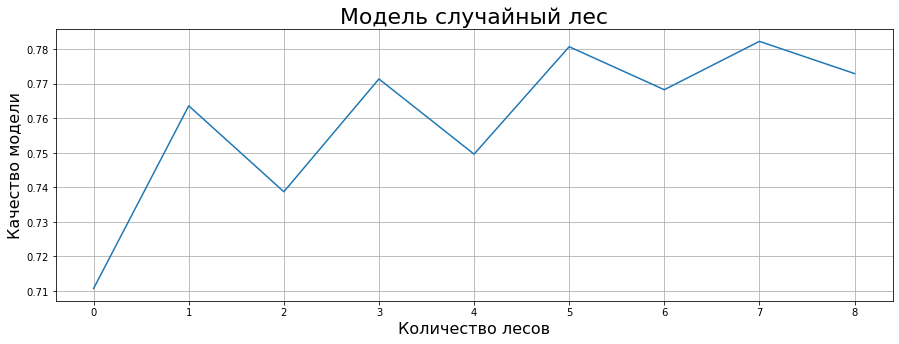

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(random)
plt.xlabel("Количество лесов", fontsize=16)
plt.ylabel("Качество модели", fontsize=16)
plt.title("Модель случайный лес", fontsize=22)
plt.grid()
plt.show()

По результатам исследования видим что лучшая модель в **7** лесу, качество модели равно 0.78

In [10]:
#так же рассмотрим модель логистичекой регресии
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
result_Log = model.score(features_valid, target_valid)
print("Качество модели логистической регрессии:", result_Log)

Качество модели логистической регрессии: 0.7107309486780715


In [22]:
#Соберем все в один ДФ

data = pd.DataFrame(columns=['DecisionTreeClassifier','RandomForestClassifier'])
data['DecisionTreeClassifier'] = decision["model_quality_decision"]
data['RandomForestClassifier'] = random["model_quality_random"]
data

,DecisionTreeClassifier,RandomForestClassifier
0,0.754277,0.710731
1,0.782271,0.763608
2,0.785381,0.738725
3,0.779160,0.771384
4,0.779160,0.749611
5,0.783826,0.780715
6,0.782271,0.768274
7,0.779160,0.782271
8,0.782271,0.772939


**Вывод:**  
> Исходя из полученных результатов мы видим что модель **"Дерева решений"** показывает лучший результат : при глубине равной 2, Accuracy: 0.785

## Проверьте модель на тестовой выборке

In [11]:
model = DecisionTreeClassifier(random_state=12345, max_depth=2)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
result = accuracy_score(target_test, predictions)
print("Качество модели на тестовой выборке", result)

Качество модели на тестовой выборке 0.7744945567651633


**Вывод:**  
> Мы видим что на тестовой выборке качество модели понизилось и равно 0.7744945567651633

## (бонус) Проверьте модели на адекватность

Наша модель показала результат 0.785 а это значит что она  адекватна

In [12]:
df["is_ultra"].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Пусть наша модель всегда будет предсказывать тариф «Смарт». Тогда точность модели будет равна примерно 69%, но точность нашей лучшей модели больше и равна 78,5%, поэтому можем заключить, что проверка на адекватность пройдена успешно. Ура